# Name: Parth Kothari
# Course: MSc
# Roll number: 2303121012

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

## Plotting dark matter and Halo maps for 512 grids

In [10]:
def plotter_map(filepath,name):
    f = open(filepath) #path to map
    N  = np.fromfile(f, count=3, dtype='uint64')
    N1,N2,N3 = N
    print(N1,N2,N3)
    l = np.fromfile(f, count=1, dtype='float32')
    print(l)
    data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
    f.close()
    data = np.reshape(data, (N1,N2,N3), order='C')
    index = 15 #x-y slice
    image = np.log10(data[0:128,0:128,index])
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title(f'{name} at redshift {filepath[-5]}')
    im = ax.imshow(image, interpolation='none', origin='lower', cmap='magma')
    fig.colorbar(im, ax=ax, label='$log(1+\delta)$')
    plt.show()


128 128 128
[0.28]


<ipython-input-10-f2d975e9f591>:12: RuntimeWarning: divide by zero encountered in log10
  image = np.log10(data[0:128,0:128,index])


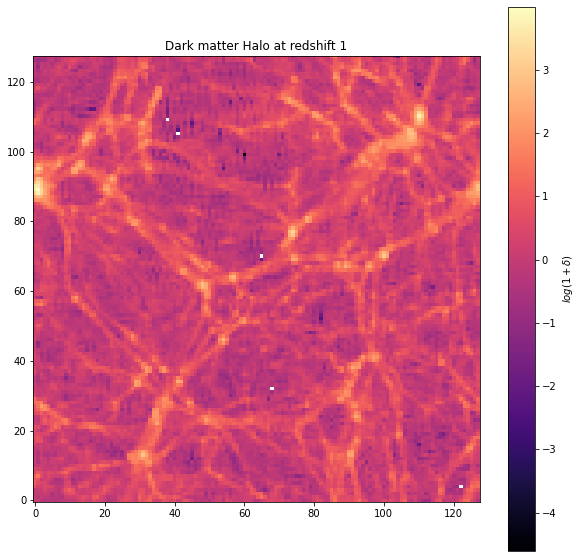

128 128 128
[0.28]


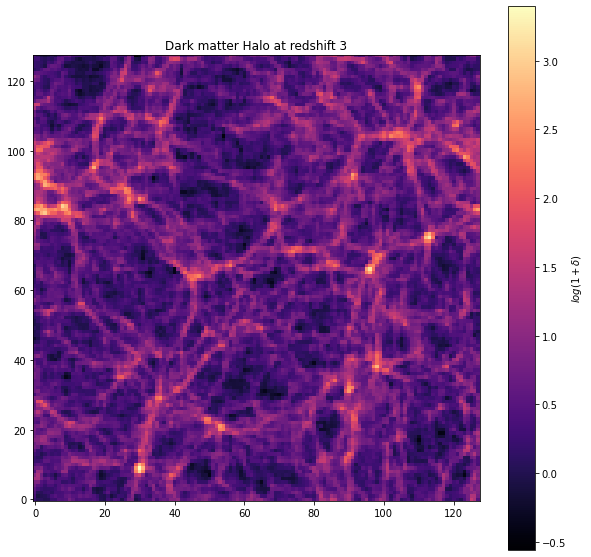

128 128 128
[0.28]


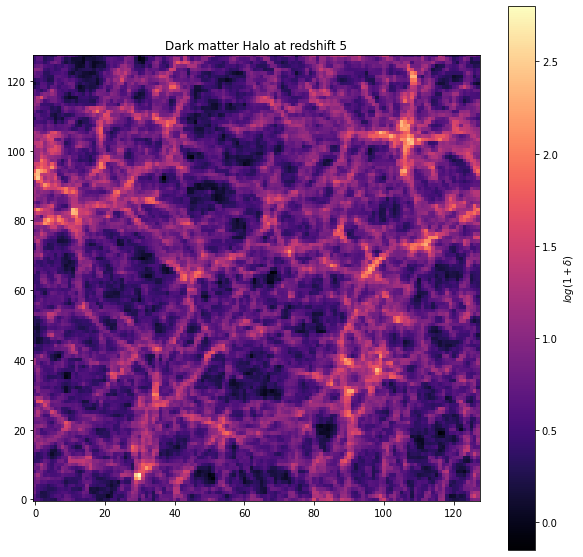

128 128 128
[0.28]


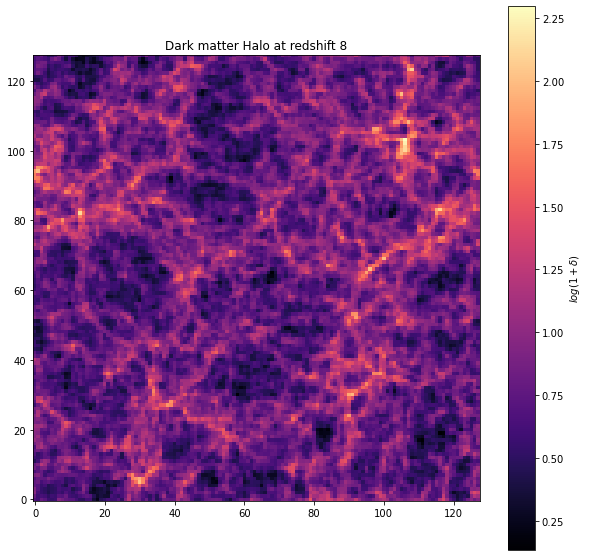

128 128 128
[0.28]


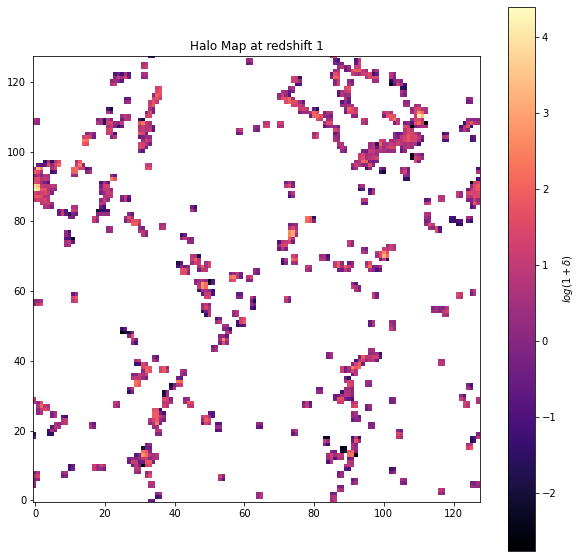

128 128 128
[0.28]


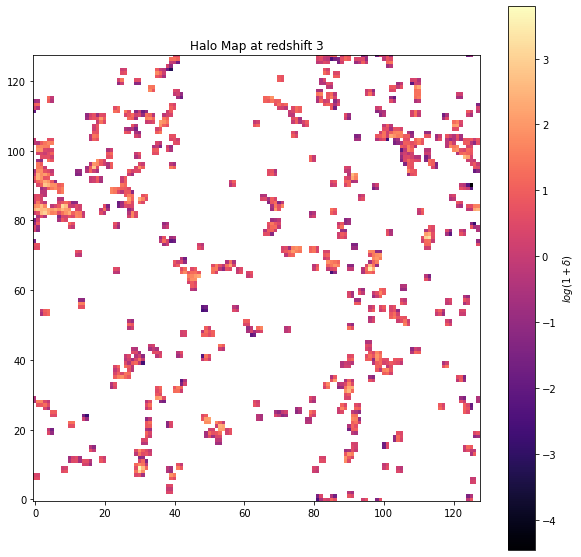

128 128 128
[0.28]


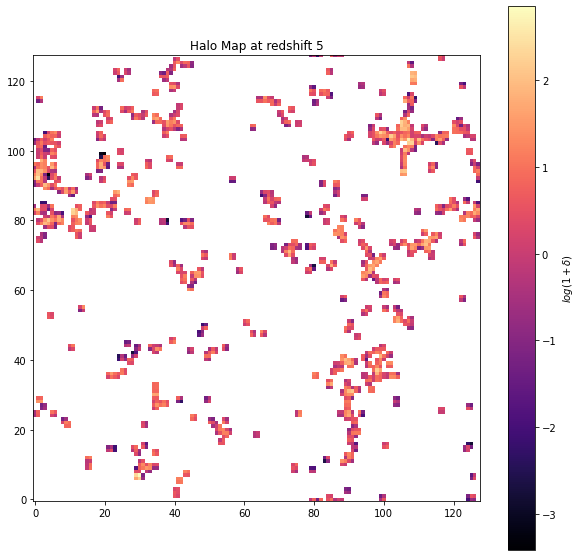

128 128 128
[0.28]


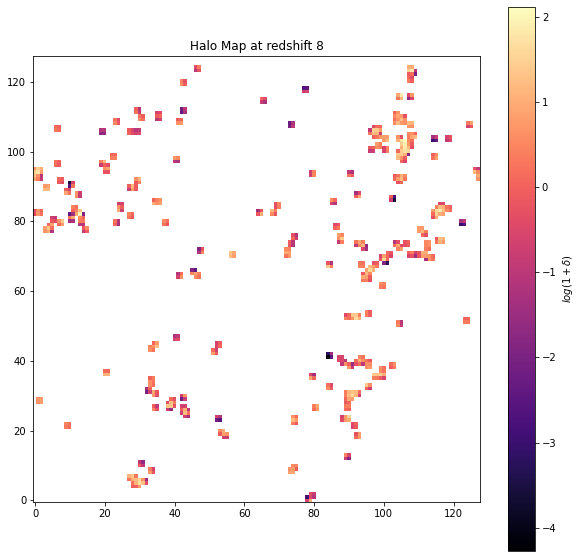

In [11]:
Dark_matter_512_standard= ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_8.000']
Halo_map_512_standard = ['/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_1.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_3.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_5.000',
      '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_8.000']
for i in Dark_matter_512_standard:
    plotter_map(i,'Dark matter Halo')
for j in Halo_map_512_standard:
    plotter_map(j,'Halo Map')

## Power spectrum of each halo and dark matter map at 10 k bins 

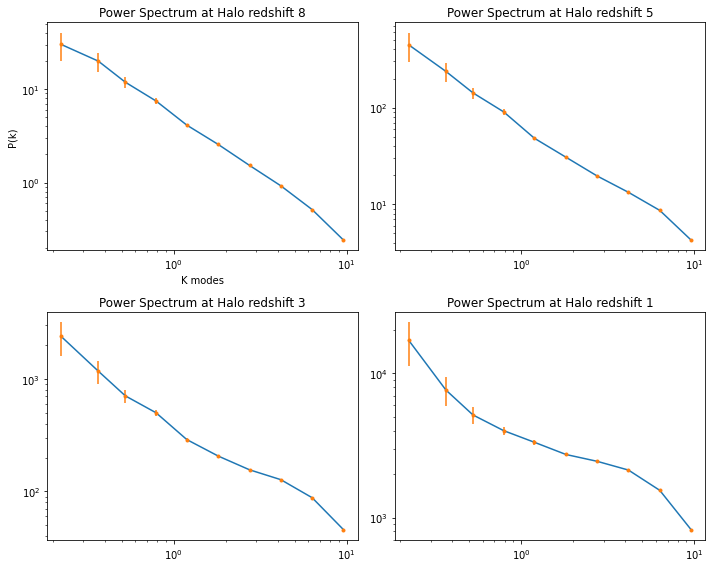

In [14]:
 # Load data
Data_halo_1 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_power_8.000')
Data_halo_2 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_power_5.000')
Data_halo_3 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_power_3.000')
Data_halo_4 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_power_1.000')

# Calculate error bars for each dataset
samples_1 = Data_halo_1[:, 4]
error_bars_1 = Data_halo_1[:, 1] / np.sqrt(samples_1)

samples_2 = Data_halo_2[:, 4]
error_bars_2 = Data_halo_2[:, 1] / np.sqrt(samples_2)

samples_3 = Data_halo_3[:, 4]
error_bars_3 = Data_halo_3[:, 1] / np.sqrt(samples_3)

samples_4 = Data_halo_4[:, 4]
error_bars_4 = Data_halo_4[:, 1] / np.sqrt(samples_4)

# Initialize figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data for Data_halo_1
axs[0, 0].plot(Data_halo_1[:, 0], Data_halo_1[:, 1])
axs[0, 0].errorbar(Data_halo_1[:, 0], Data_halo_1[:, 1], yerr=error_bars_1, fmt='o', markersize=3)
axs[0, 0].set_title('Power Spectrum at Halo redshift 8')
axs[0,0].set_xlabel('K modes')
axs[0,0].set_ylabel('P(k)')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

# Plot data for Data_halo_2
axs[0, 1].plot(Data_halo_2[:, 0], Data_halo_2[:, 1])
axs[0, 1].errorbar(Data_halo_2[:, 0], Data_halo_2[:, 1], yerr=error_bars_2, fmt='o', markersize=3)
axs[0, 1].set_title('Power Spectrum at Halo redshift 5')
axs[0,1].set_xlabel('K modes')
axs[0,1].set_ylabel('P(k)')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

# Plot data for Data_halo_3
axs[1, 0].plot(Data_halo_3[:, 0], Data_halo_3[:, 1])
axs[1, 0].errorbar(Data_halo_3[:, 0], Data_halo_3[:, 1], yerr=error_bars_3, fmt='o', markersize=3)
axs[1, 0].set_title('Power Spectrum at Halo redshift 3')
axs[1,0].set_xlabel('K modes')
axs[1,0].set_ylabel('P(k)')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

# Plot data for Data_halo_4
axs[1, 1].plot(Data_halo_4[:, 0], Data_halo_4[:, 1])
axs[1, 1].errorbar(Data_halo_4[:, 0], Data_halo_4[:, 1], yerr=error_bars_4, fmt='o', markersize=3)
axs[1, 1].set_title('Power Spectrum at Halo redshift 1')
axs[1,1].set_xlabel('K modes')
axs[1,1].set_ylabel('P(k)')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


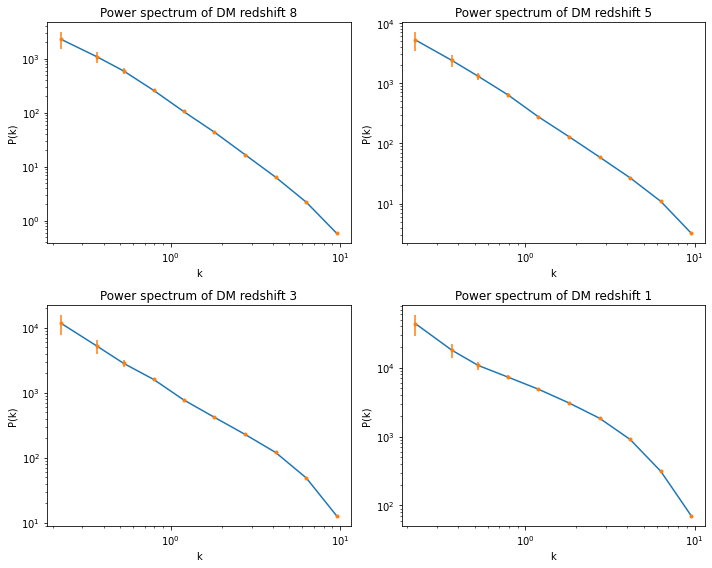

In [15]:
# Load data
data_DM_power_1 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_power_8.000')
data_DM_power_2 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_power_5.000')
data_DM_power_3 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_power_3.000')
data_DM_power_4 = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_power_1.000')

# Calculate error bars for each dataset
samples_1 = data_DM_power_1[:, 4]
error_bars_1 = data_DM_power_1[:, 1] / np.sqrt(samples_1)

samples_2 = data_DM_power_2[:, 4]
error_bars_2 = data_DM_power_2[:, 1] / np.sqrt(samples_2)

samples_3 = data_DM_power_3[:, 4]
error_bars_3 = data_DM_power_3[:, 1] / np.sqrt(samples_3)

samples_4 = data_DM_power_4[:, 4]
error_bars_4 = data_DM_power_4[:, 1] / np.sqrt(samples_4)

# Initialize figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data for data_DM_power_1
axs[0, 0].plot(data_DM_power_1[:, 0], data_DM_power_1[:, 1])
axs[0, 0].errorbar(data_DM_power_1[:, 0], data_DM_power_1[:, 1], yerr=error_bars_1, fmt='o', markersize=3)
axs[0, 0].set_title('Power spectrum of DM redshift 8')
axs[0,0].set_xlabel('k')
axs[0,0].set_ylabel('P(k)')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

# Plot data for data_DM_power_2
axs[0, 1].plot(data_DM_power_2[:, 0], data_DM_power_2[:, 1])
axs[0, 1].errorbar(data_DM_power_2[:, 0], data_DM_power_2[:, 1], yerr=error_bars_2, fmt='o', markersize=3)
axs[0, 1].set_title('Power spectrum of DM redshift 5')
axs[0,1].set_xlabel('k')
axs[0,1].set_ylabel('P(k)')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

# Plot data for data_DM_power_3
axs[1, 0].plot(data_DM_power_3[:, 0], data_DM_power_3[:, 1])
axs[1, 0].errorbar(data_DM_power_3[:, 0], data_DM_power_3[:, 1], yerr=error_bars_3, fmt='o', markersize=3)
axs[1, 0].set_title('Power spectrum of DM redshift 3')
axs[1,0].set_xlabel('k')
axs[1,0].set_ylabel('P(k)')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

# Plot data for data_DM_power_4
axs[1, 1].plot(data_DM_power_4[:, 0], data_DM_power_4[:, 1])
axs[1, 1].errorbar(data_DM_power_4[:, 0], data_DM_power_4[:, 1], yerr=error_bars_4, fmt='o', markersize=3)
axs[1, 1].set_title('Power spectrum of DM redshift 1')
axs[1,1].set_xlabel('k')
axs[1,1].set_ylabel('P(k)')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# b(k) = P_halo(k)/P_DM(k) 

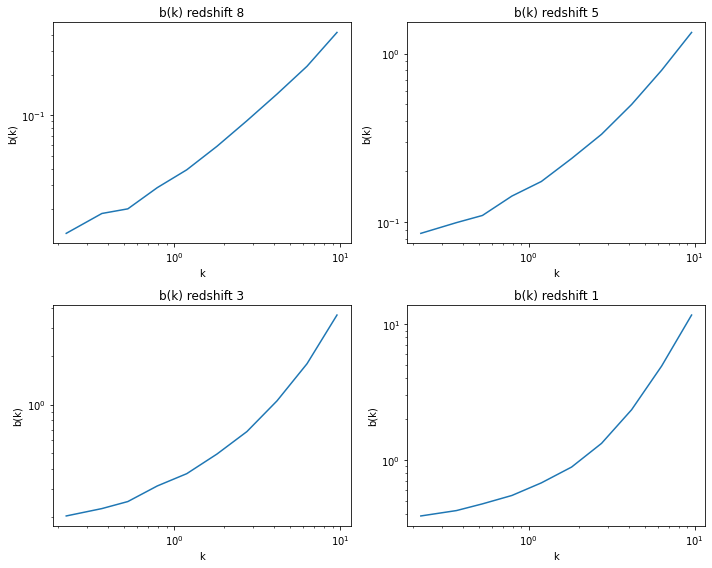

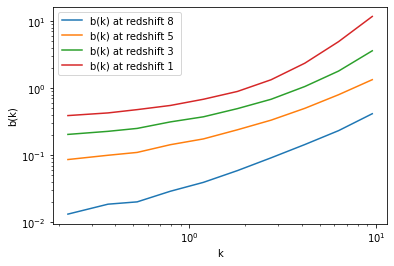

In [18]:
# Calculate b_k for each dataset
b_k_1_halo = Data_halo_1[:, 1] / data_DM_power_1[:, 1]
b_k_2_halo = Data_halo_2[:, 1] / data_DM_power_2[:, 1]
b_k_3_halo = Data_halo_3[:, 1] / data_DM_power_3[:, 1]
b_k_4_halo = Data_halo_4[:, 1] / data_DM_power_4[:, 1]

# Initialize figure and subplots

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot b(k) for Data_halo_1
axs[0, 0].plot(Data_halo_1[:, 0], b_k_1_halo)
axs[0, 0].set_title('b(k) redshift 8')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('b(k)')

# Plot b(k) for Data_halo_2
axs[0, 1].plot(Data_halo_2[:, 0], b_k_2_halo)
axs[0, 1].set_title('b(k) redshift 5')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('b(k)')

# Plot b(k) for Data_halo_3
axs[1, 0].plot(Data_halo_3[:, 0], b_k_3_halo)
axs[1, 0].set_title('b(k) redshift 3')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('b(k)')

# Plot b(k) for Data_halo_4
axs[1, 1].plot(Data_halo_4[:, 0], b_k_4_halo)
axs[1, 1].set_title('b(k) redshift 1')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('b(k)')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
plt.xscale('log') , plt.yscale('log')
plt.plot(Data_halo_1[:, 0],b_k_1_halo,label='b(k) at redshift 8 ')
plt.plot(Data_halo_2[:, 0],b_k_2_halo,label='b(k) at redshift 5 ')
plt.plot(Data_halo_3[:, 0],b_k_3_halo,label='b(k) at redshift 3')
plt.plot(Data_halo_4[:, 0],b_k_4_halo,label='b(k) at redshift 1')
plt.xlabel('k')
plt.ylabel('b(k)')
plt.legend()


## Convolution process for all maps

In [28]:
# Number of gridpoints
N = 128

# Generated grid
x = np.linspace(-10, 10, N, endpoint=True)
y = np.linspace(-10, 10, N, endpoint=True)
z = np.linspace(-10, 10, N, endpoint=True)
X, Y, Z = np.meshgrid(x, y, z)

def Three_d_plotter(grid,name):
  # Creating  a 3D plot
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Flatten the grid coordinates and grid values for scatter plot
  x_flatten = X.flatten()
  y_flatten = Y.flatten()
  z_flatten = Z.flatten()
  grid_flatten = grid.flatten()

  # Plot the 3D scatter plot
  scatter = ax.scatter(x_flatten, y_flatten, z_flatten, c=grid_flatten, cmap='Spectral')

  # Create a ScalarMappable for colormap
  sm = ScalarMappable(cmap='Spectral')
  sm.set_array(grid_flatten)
  fig.colorbar(sm, ax=ax, label='Grid Value')

  # Set labels and title
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title(f'{name}')

  plt.show()

def sphere_3D(Number_of_points,radius,normalization):
  
  origin_of_sphere = (Number_of_points//2)  -1   #This solves the problem for odd number of points
  x = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points) 
  y = np.linspace(-origin_of_sphere, Number_of_points-  origin_of_sphere, Number_of_points)
  z = np.linspace(-origin_of_sphere, Number_of_points - origin_of_sphere, Number_of_points)
  X, Y, Z = np.meshgrid(x, y, z)
    # Initialize grid with zeros
  grid_new = np.zeros((Number_of_points, Number_of_points, Number_of_points))


  # Calculate distances from the center
  distances = np.sqrt(X**2 + Y**2 + Z**2)



  # Set values inside the sphere to 1
  grid_new[distances <= radius] = 1

  if normalization == 'Yes':
    c =  grid_new / np.sum(grid_new)
    return c
  elif normalization == 'No':
    c = grid_new
    return c
  else:
    raise ValueError('Pls provide Yes or No as parameter')

def FFT_to_invt(data,rad,normalization):
    sphere = sphere_3D(128,rad,normalization)                      
    sphere_filter_fft = np.fft.fftn(sphere)             #Taking FFT of the filter
    sphere_shift = np.fft.fftshift(sphere_filter_fft)   #Shifting the origin

    fft_grid = np.fft.fftn(data)                     #Same for the grid
    fft_shift_grid = np.fft.fftshift(fft_grid)

    FFT_of_both = fft_shift_grid * sphere_shift
    inverse_fft = np.fft.ifftn(FFT_of_both)
    return np.abs(inverse_fft)


## Dark matter map 

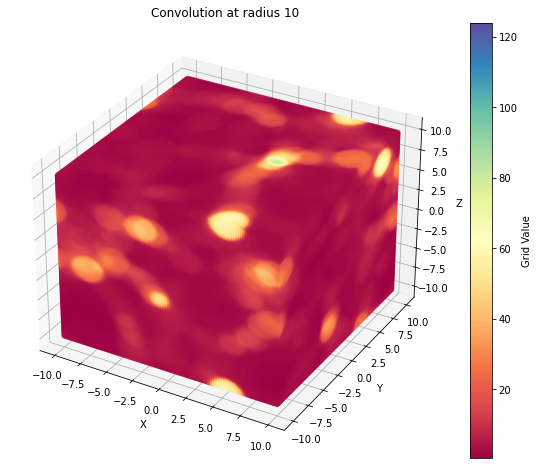

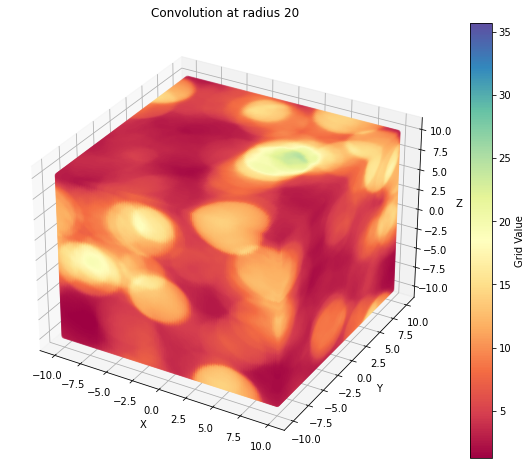

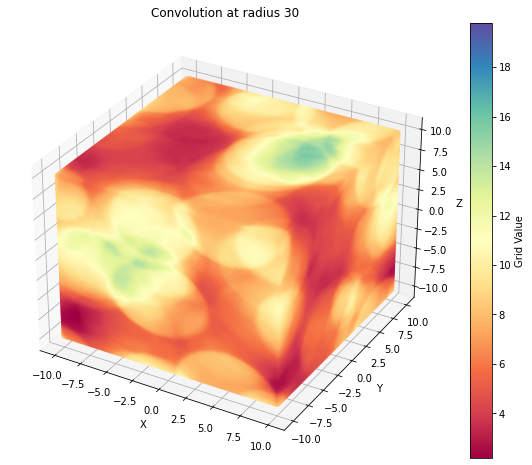

In [30]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_1.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_1 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]

for i in radius:
    array_made = FFT_to_invt(DM_map_1,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')
    

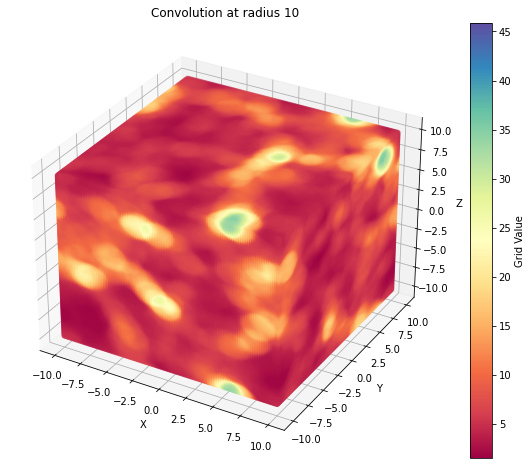

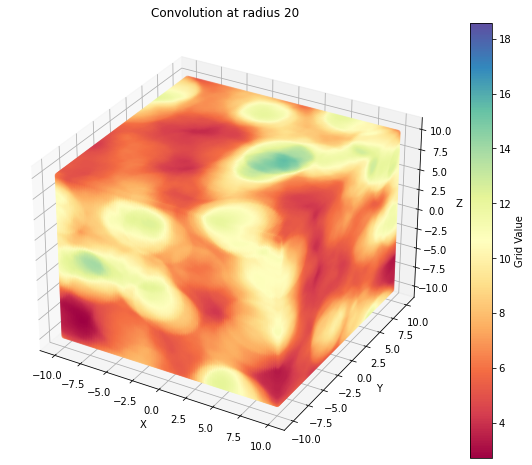

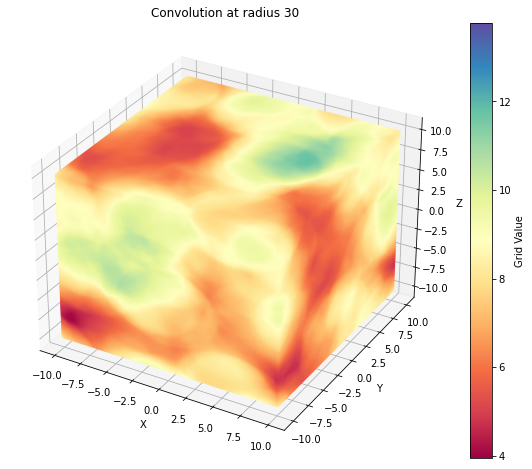

In [31]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_3.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_3 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_3,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

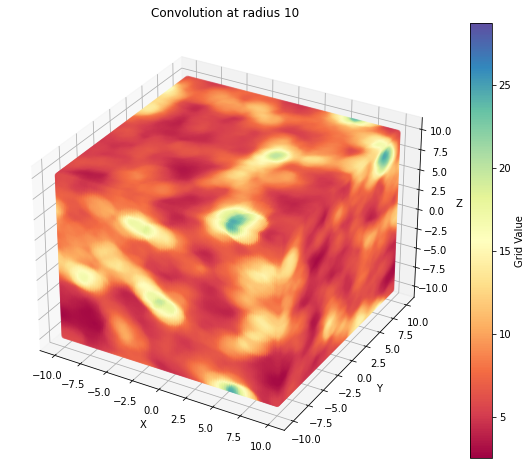

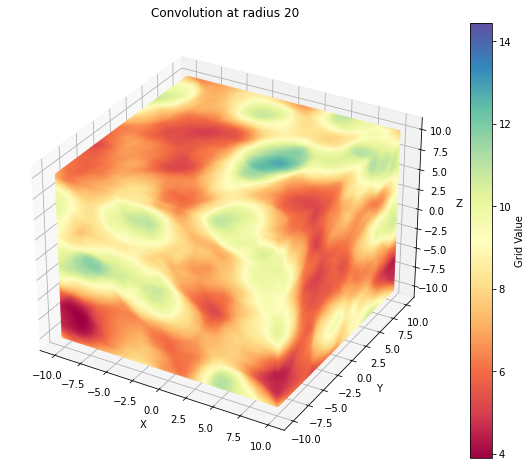

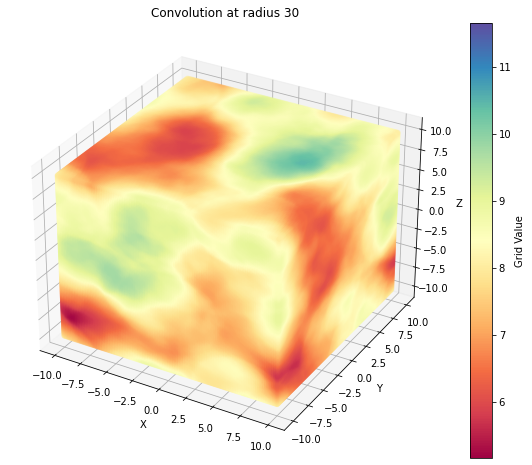

In [32]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_5.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_5 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_5,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')


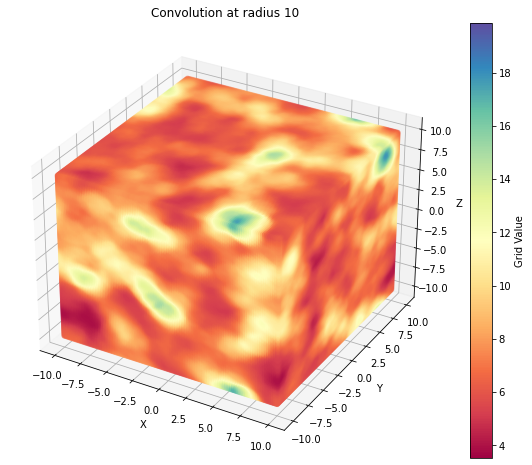

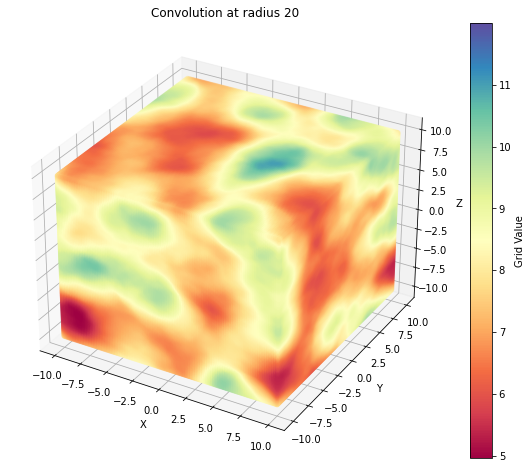

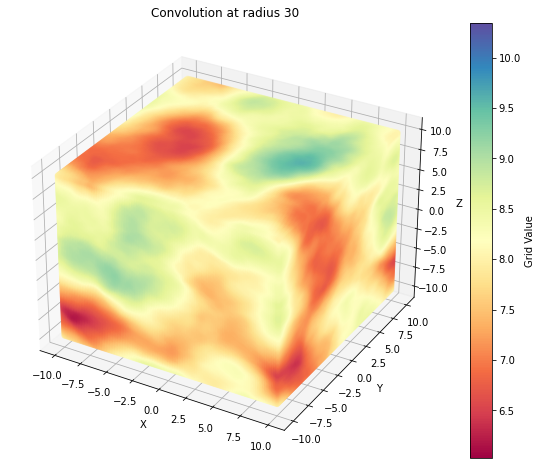

In [33]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/DM_map_8.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
DM_map_8 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(DM_map_8,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

## Halo map convolution

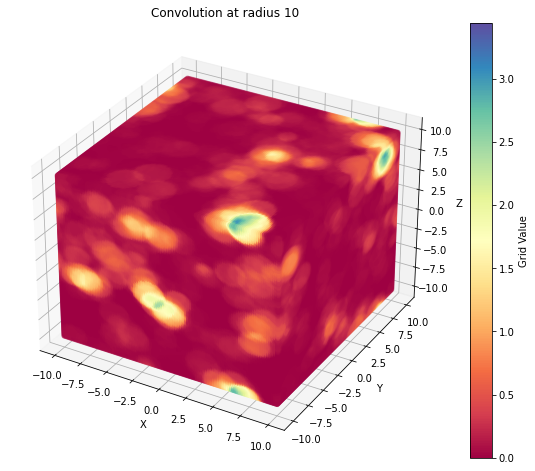

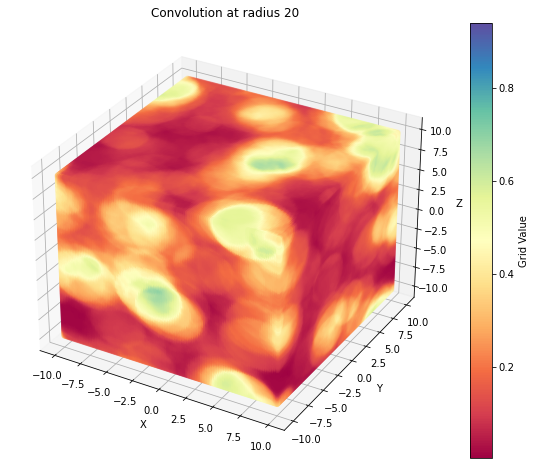

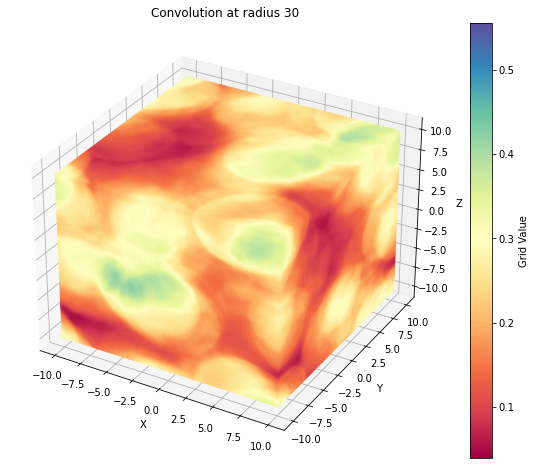

In [34]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_8.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_8 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_8,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

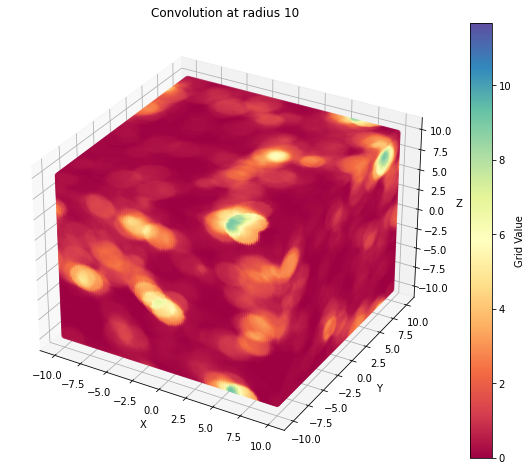

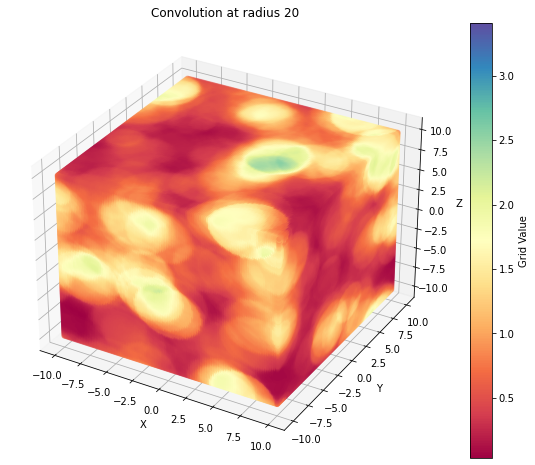

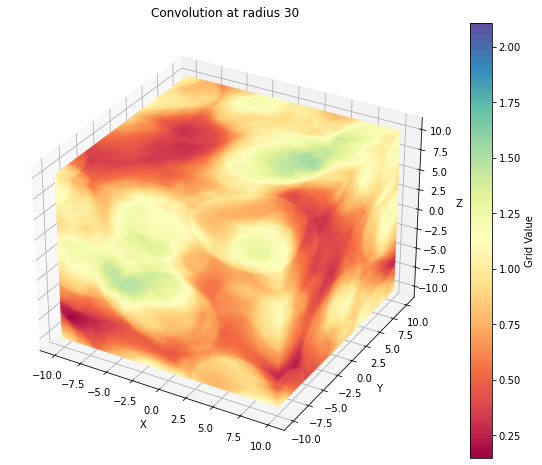

In [36]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_5.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_5 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_5,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

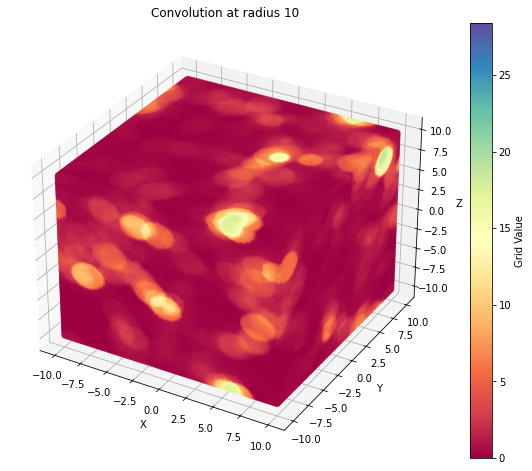

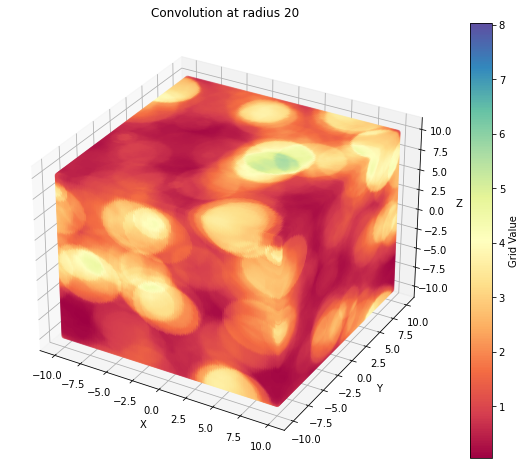

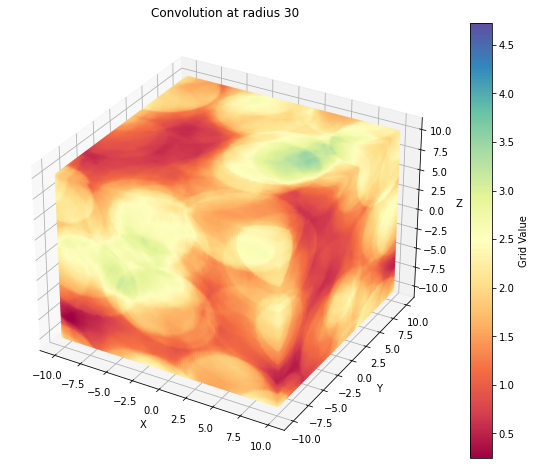

In [35]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_3.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_3 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_3,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

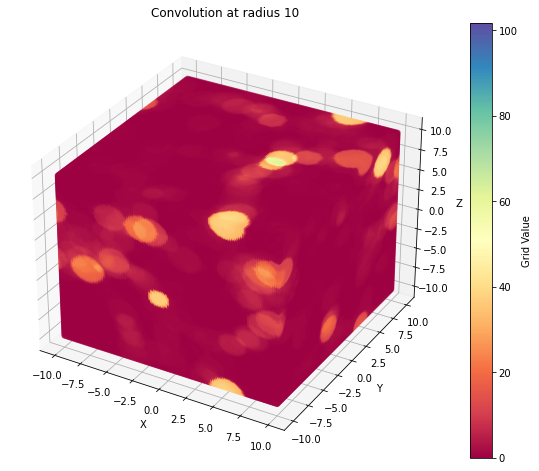

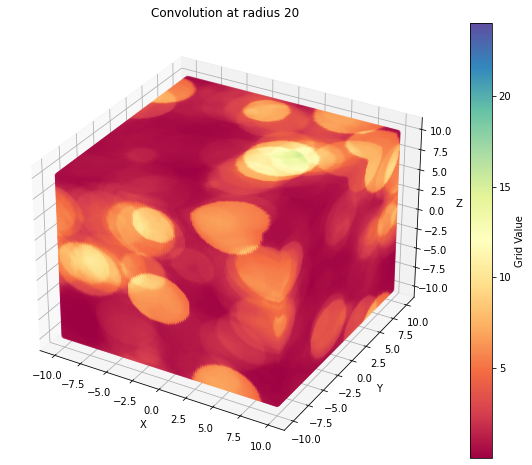

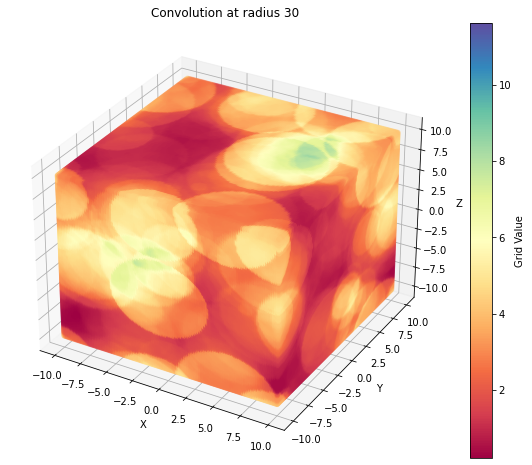

In [37]:
f = open('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/Halo_map_1.000') #path to map
N  = np.fromfile(f, count=3, dtype='uint64')
N1,N2,N3 = N
l = np.fromfile(f, count=1, dtype='float32')
data = np.fromfile(f, count=N1*N2*N3, dtype='float32')
f.close()
Halo_map_1 = np.reshape(data, (N1,N2,N3), order='C')
radius = [10,20,30]
for i in radius:
    array_made = FFT_to_invt(Halo_map_1,i,'Yes')
    Three_d_plotter(array_made,f'Convolution at radius {i}')

## Power spectrum for 5 k bins

In [38]:
def Power_spectrum(path_D,path_H):

    # For density
    data_D = np.genfromtxt(path_D).transpose()
    k_mode_D = data_D[0]
    Power_D = data_D[1]
    Bins_D = data_D[4]

    # For halo
    data_H = np.genfromtxt(path_H).transpose()
    k_mode_H = data_H[0]
    Power_H = data_H[1]
    Bins_H = data_H[4]

    # For Bias
    p = Power_H / Power_D

    # Plotting
    plt.figure(figsize=(21, 6)) 

    plt.subplot(1, 3, 1)
    plt.plot(k_mode_D, Power_D)
    plt.errorbar(k_mode_D,Power_D,Power_D/np.sqrt(Bins_D))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_D[-5]} for Density of dark matter")
    
    plt.subplot(1, 3, 2)
    plt.plot(k_mode_H, Power_H)
    plt.errorbar(k_mode_H,Power_H,Power_H/np.sqrt(Bins_H))
    plt.xlabel("k mode")
    plt.ylabel("Power")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum at $z = ${path_H[-5]} for Dark matter Halo")

    plt.subplot(1, 3, 3)
    plt.plot(k_mode_D, p)
    plt.xlabel("k mode")
    plt.ylabel("Power bias")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(fr"Power spectrum bias at $z = ${path_D[-5]}")

    plt.tight_layout()  
    plt.show()

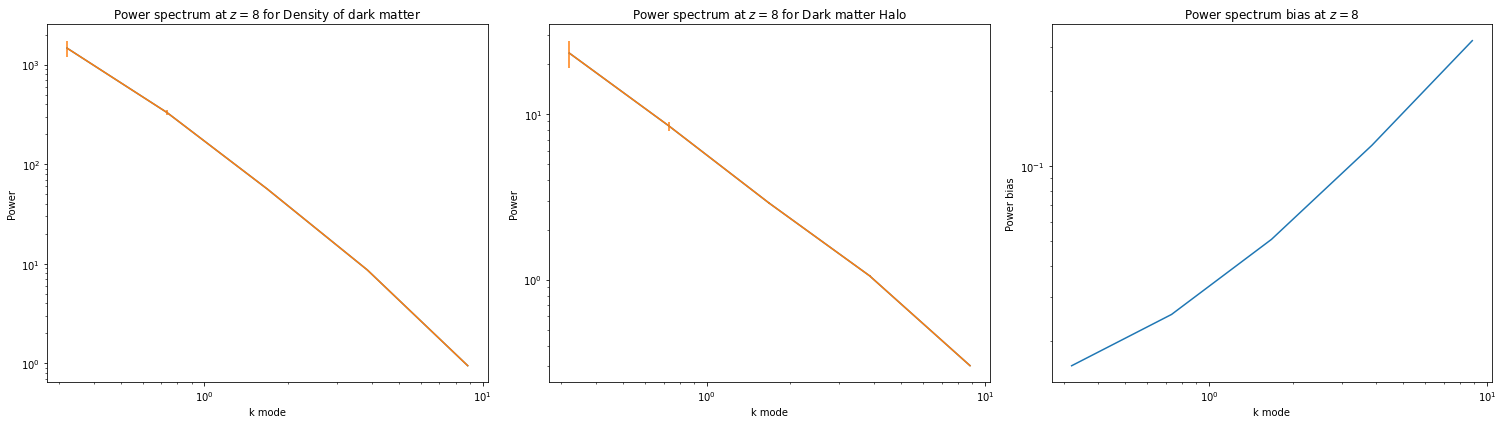

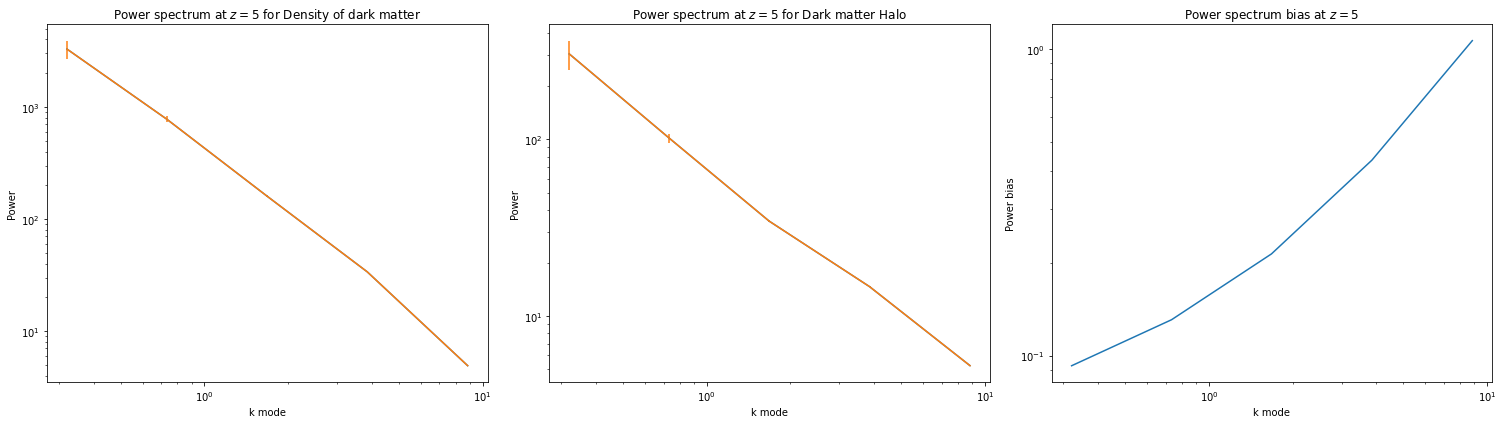

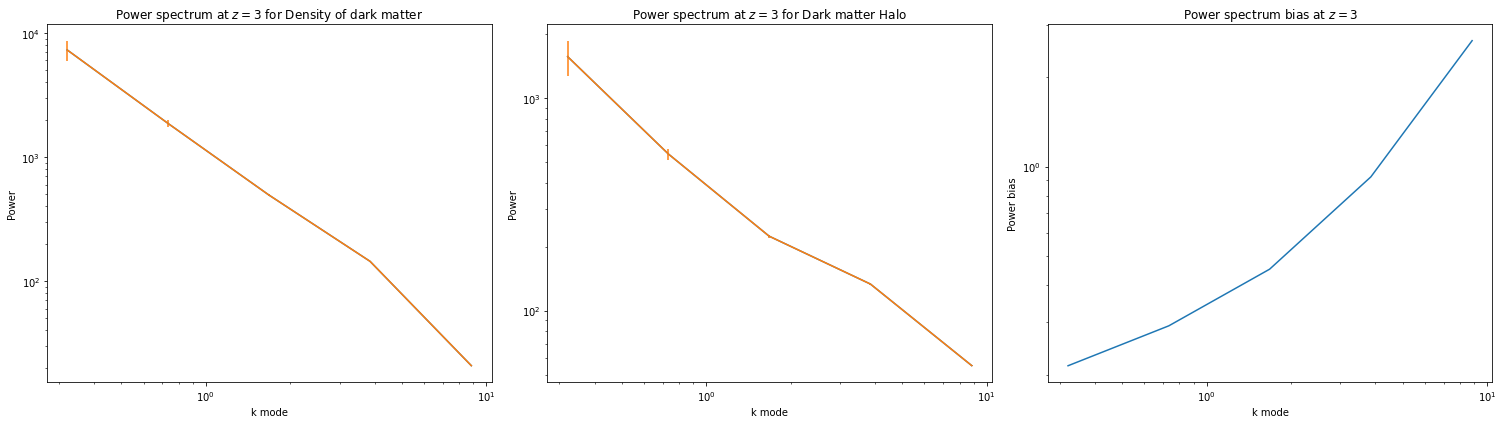

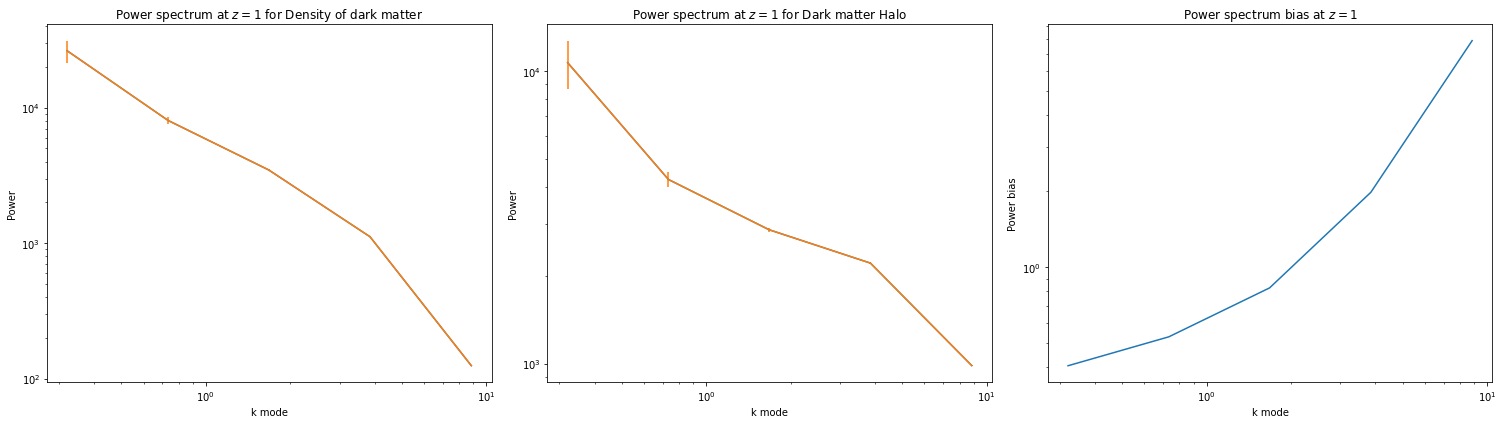

In [39]:
D11_512 = '/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_DM_power_1.000'
H11_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_Halo_power_1.000"
D33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_DM_power_3.000"
H33_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_Halo_power_3.000"
D55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_DM_power_5.000"
H55_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_Halo_power_5.000"
D88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_DM_power_8.000"
H88_512 = "/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/Density128_grid_512_DM _and_Halo_maps_Standard _model/5kbin_Halo_power_8.000"

d1_512 = [D88_512,D55_512,D33_512,D11_512]
h1_512 = [H88_512,H55_512,H33_512,H11_512]

for i,j in zip(d1_512,h1_512):
    Power_spectrum(i,j)

In [26]:
# Calculating pk after convolution
# New_array = V.copy()

# filename = "New_array.bin"

# # Get the dimensions of the array
# N1, N2, N3 = New_array.shape

# # Open the binary file in write mode
# with open(filename, 'wb') as f:
#     # Write the dimensions to the file
#     np.array([N1], dtype=np.int64).tofile(f)
#     np.array([N2], dtype=np.int64).tofile(f)
#     np.array([N3], dtype=np.int64).tofile(f)
   
#     # Write the array data to the file
#     New_array.flatten().astype(np.float32).tofile(f)
# data = np.genfromtxt('/home/idies/workspace/Storage/Parth_Kothari/persistent/codes/ReionYuga-master/power_spectra_after_convolution')
# samples_1 = data[:, 4]
# error_bars_1 = data[:, 1] / np.sqrt(samples_1)

# plt.plot(data[:, 0], data[:, 1])
# plt.errorbar(data[:, 0], data[:, 1], yerr=error_bars_1, fmt='o', markersize=3)
# plt.xscale('log')
# plt.yscale('log')